In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import os
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:

# Load the data
data = pd.read_csv(r"C:\Users\Motunrayo Adeyemi\Documents\a_data\all_stocks_5yr.csv")
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [14]:
access_data = data["Name"].value_counts()
print(access_data)

Name
ZTS     1259
AAL     1259
AAPL    1259
AAP     1259
ABBV    1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64


In [15]:
data.shape

(619040, 7)

In [17]:
data.describe()


,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [18]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [19]:
data.describe(include='all')


,date,open,high,low,close,volume,Name
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05,619040
unique,1259,NaN,NaN,NaN,NaN,NaN,505
top,2018-01-09,NaN,NaN,NaN,NaN,NaN,ZTS
freq,505,NaN,NaN,NaN,NaN,NaN,1259
mean,NaN,83.023334,83.778311,82.256096,83.043763,4.321823e+06,NaN
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06,NaN
min,NaN,1.620000,1.690000,1.500000,1.590000,0.000000e+00,NaN
25%,NaN,40.220000,40.620000,39.830000,40.245000,1.070320e+06,NaN
50%,NaN,62.590000,63.150000,62.020000,62.620000,2.082094e+06,NaN
75%,NaN,94.370000,95.180000,93.540000,94.410000,4.284509e+06,NaN


In [20]:
data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

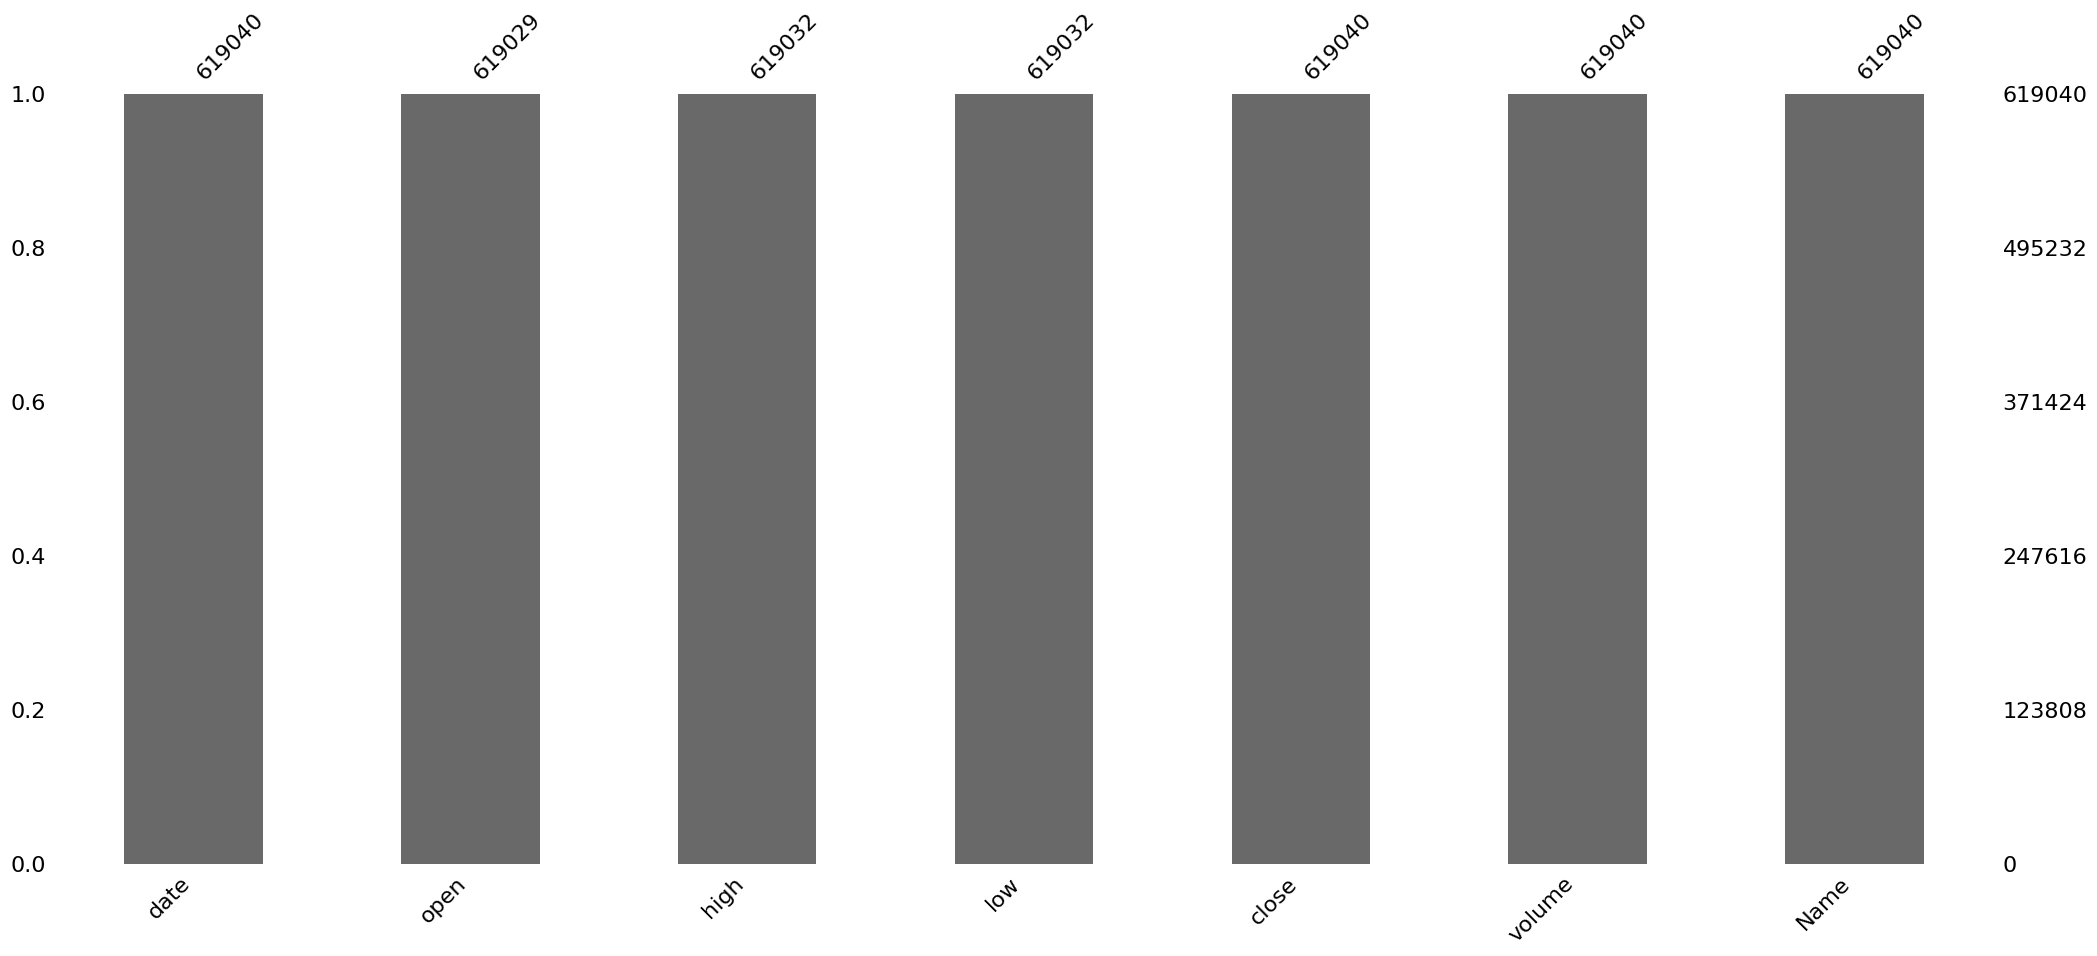

In [22]:
import missingno as msno
msno.bar(data)  # Visual representation of missing values
plt.show()

In [23]:
data.duplicated().sum()

np.int64(0)

In [24]:
data["date"] = pd.to_datetime(data["date"])

In [25]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [26]:
data["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

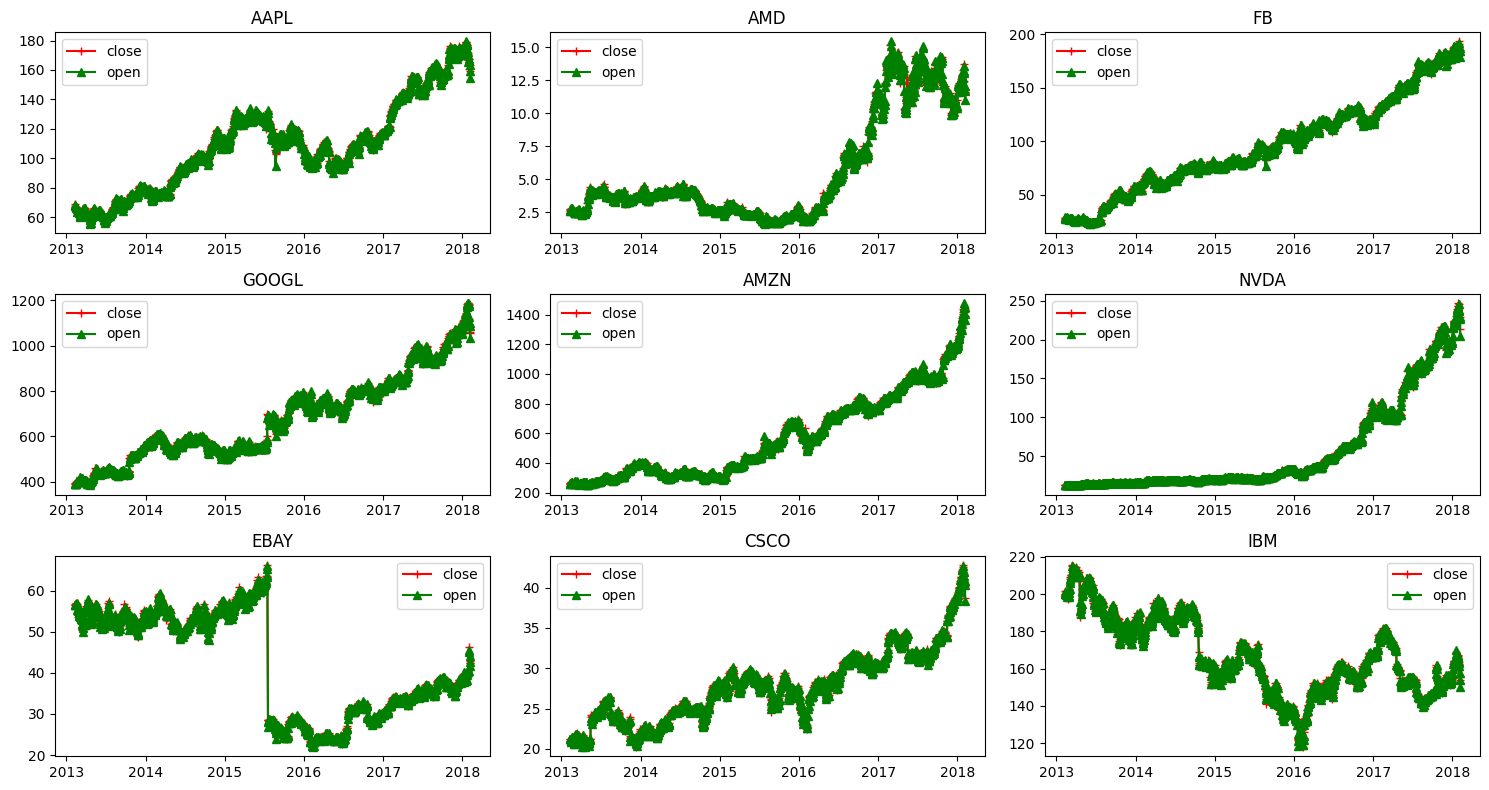

In [27]:
# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
	plt.title(company)
	plt.legend()
	plt.tight_layout()

Visualize the 9 selected stocks

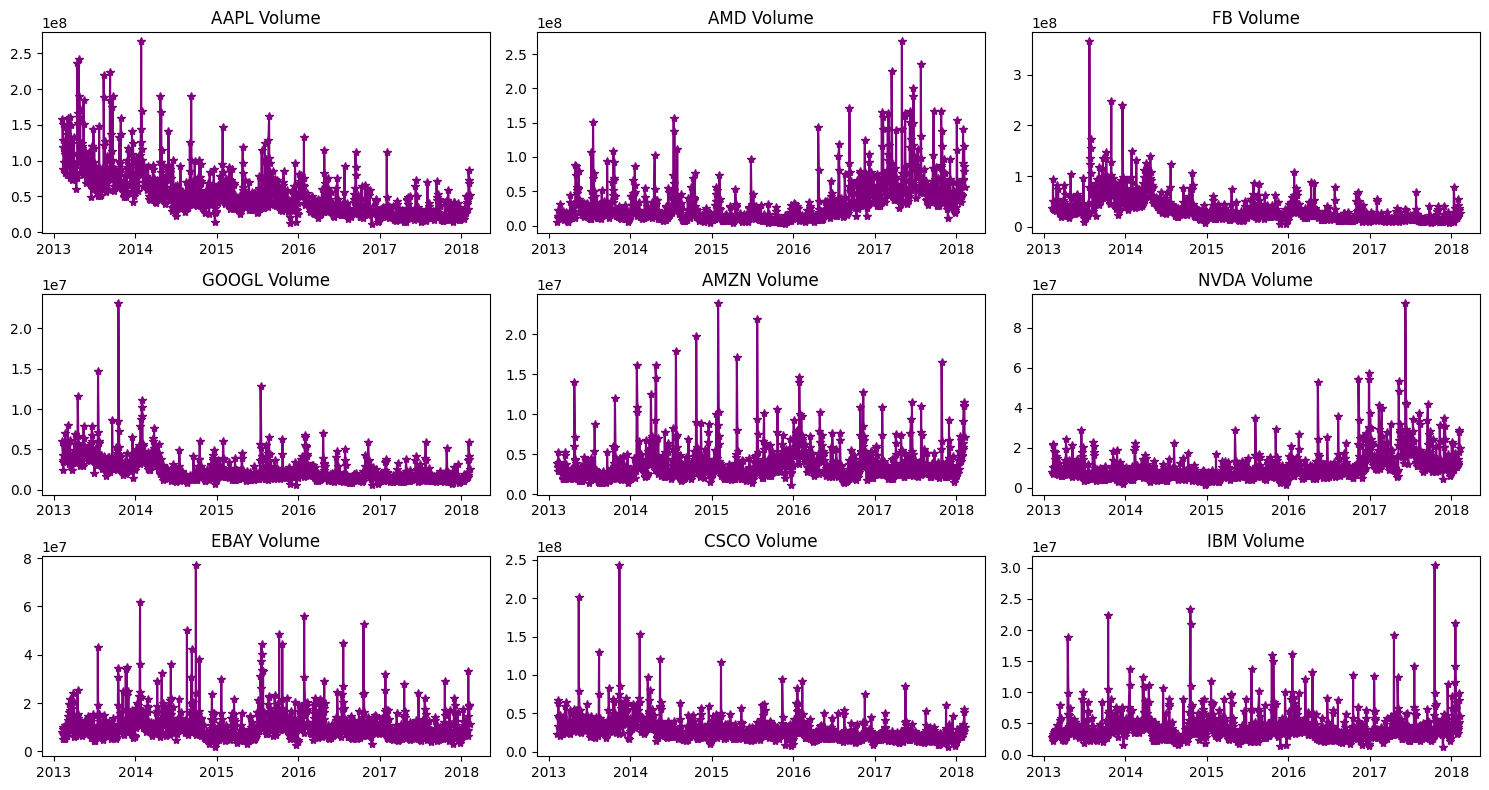

In [ ]:

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()

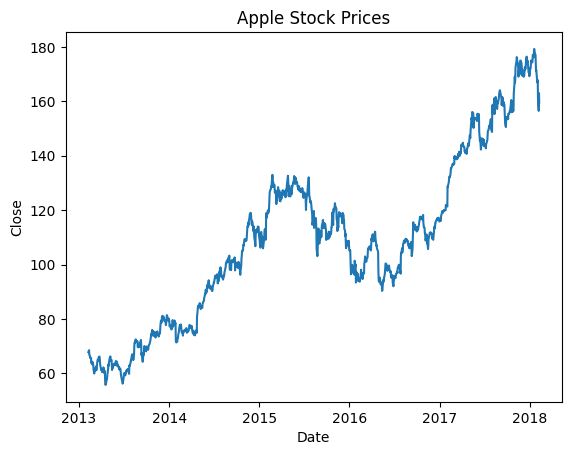

In [29]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

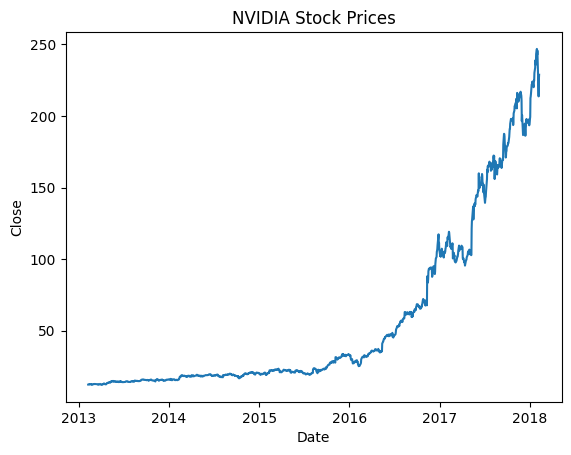

In [30]:
NVIDIA = data[data['Name'] == 'NVDA']
prediction_range = NVIDIA.loc[(NVIDIA['date'] > datetime(2013,1,1))
& (NVIDIA['date']<datetime(2018,1,1))]
plt.plot(NVIDIA['date'],NVIDIA['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("NVIDIA Stock Prices")
plt.show()

In [32]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [41]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0957
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0087
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0082
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0078
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0071
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0072
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0058


In [42]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step
MSE 21.030594001143125
RMSE 4.585912559256132


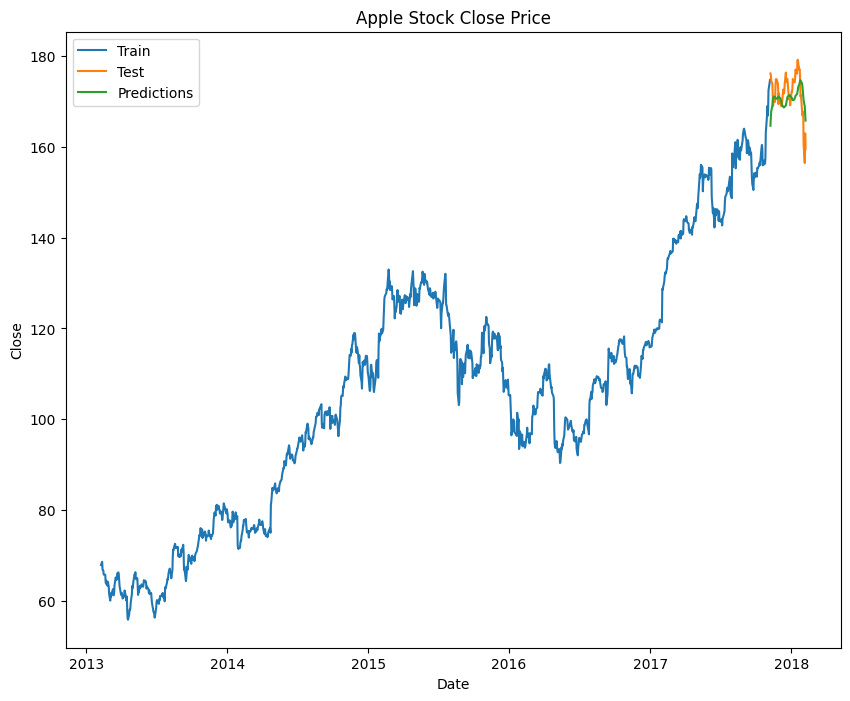

In [43]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])